# Titulo del proyecto: Planeación de corredores verdes para líneas de transmisión usando optimización multicriterio.

## Estado de avance del proyecto

Durante el desarrollo del prouecto se han registrado avances segun las actividades registradas en el cronograma.

* **Etapa 5 (E5).** Dada la verificación del prototipo funcional integrando el modelo y la ténica de solución se da inicio al desarrollo de generador de mapas para las pruebas que requiere el modelo en distintos escenarios.
* **Etapa 6 (E6).** Se da inicio al desarrollo en un ambiente profesional usando el lenguaje Python que nos permitirá bajar a campo los elementos encontrados en la etapa anterior y simular el comportamiento de distintos terrenos con el fin de demostrar la eficacia del modelo.

## Planeación de corredores verdes para líneas de transmisión usando optimización multicriterio.

En la etapa de planeación de una línea de transmisión, encontrar la ruta óptima es un problema complejo que involucra aspectos ambientales, geográficos, geológicos, sociales, económicos, de transporte y de distancias, entre otros. No significa que únicamente se deba encontrar la ruta más corta, o la ruta que provea más capacidad de transmisión, o la ruta más económica, es más bien encontrar un compromiso óptimo de múltiples aspectos. Muchos criterios considerados en la planeación del corredor de una línea de transmisión pueden ser correlacionados geográficamente, tales como: capacidad, peso, costos de servidumbre, accesos y rutas existentes, cimentación, niveles de corrosión, recursos hídricos y características de terreno, entre otros. Es decir, los indicadores de los diferentes criterios cambian de acuerdo a una ubicación georreferenciada en un mapa. Cada uno de estos criterios puede generar un mapa de calor, cuyo indicador es el costo geográfico según una escala de nivel definida. De esta manera, se pueden tener n mapas de costos, asociados a n criterios de interés. Los mapas se pueden fusionar para generar una superficie de costos integrada (SCI), la cual se consolida como un espacio multi-criterio sobre el cual se pueden realizar procesos de optimización de rutas. La ruta óptima resultante corresponde al denominado corredor verde o corredor sostenible, el cual ofrece el mejor compromiso entro los criterios de interés. La solución que se propone consisten en mejorar los procesos actuales empleados en la toma de decisiones y planeación en el campo del estudio geográfico y espacial, con procesos de optimización matemática y técnicas de campo del estudio geográfico y espacial, con procesos de optimización matemática y técnicas del campo de la inteligencia artificial. La metodología de solución óptima multicriterio se usará en ele desarrollo de una herramienta computacional que integre los procesos de optimización matemática y sistemas de información geográficos para la construncción del corredor verde. Con la posibilidad de simulación en la solución propuesta, se pueden obtener multiples relaciones de beneficio/costo.

La SCI involucra aspecto ambientales, constructivos y sociales, entre otros. Por lo tanto, un adecuado diseño del sistema de información, ajustado a la realidad de la información al alcance de las empresas de energía, es un importante valor del proyecto. La palicación de métodos de inteligencia artificial en este tipo de procesos es de gran interés académico y empresarial en la actualidad. Esta propuesta abarca el diseño del sistema de información para la construcción de la superfice de costo integrada y la aplicación de técnicas novedosas y eficientes de optimización. Al respecto de las técnicas de optimización, El grupo de investigación DINOP cuenta con gran experiencia en el campo de los sistemas eléctricos de potencia y, particualrmente, en optimización de rutas y planeación de redes.

### Resultados preliminares

Posterior a la realización de ruteo de una línea en un modelo de prueba. Se utilizan 4 tipos de mpas que representan las condiciones del terreno que deberá recorrer la línea de transmisión.

Para efectos de la prueba se realizan las siguientes consideraciones

* **Micro áreas**. Estas representan el tamño relativo de la zona por la que pasará una sección de la línea de transmisión. 
* **Zonas áreas**. tamaño total del mapa que representa la zona en la cual debe ser construida la ruta de la líena.
* **Costos de construcción**. Se seleccionan parámetros según cada mapa para establecer el costo de constuiral línea de transmisión en ese sector.
* **Consideración de zonas activas**. hay ciertas zonas presentes en los mapas que no pueden ser cruzadas por diferentes restricciones.
* **Áreas de bosques**. En este se establecen los niveles de vegetación presente en la zona además de se limitan con las áreas activas. Se plantea inicialmente 4 niveles de vegetación donde el prime tipo, representa zona boscosa alta, el segundo tipo zona boscosa media y el ultimo tipo corresponde a zona boscosa baja.
* **Áreas de pendientes**. Se establecen los nivels de pendiente presente en la zona, además se limitan con las áreas activas y se deben corroborar con la demás zonas para establecer un mapeo más preciso. Se plantean inicialmente 3 niveles de pendientes en donde el primer tipo representa un nivel de pendiente alto, el segundo tipo representa un nivel de pendiente medio y el tercer tipo representa un nivel de pendiente bajo.
* **Área vías**. En esta se representan la zona por la cual sexisten vías o rutas automovilísiticas. Se plantea inicialmente 5 niveles, donde cada nivel tendrá un costo disitn y el último representa la no existencia de rutas.
* **Mapa Vecinos Micro Áreas**. Es la variable que representa en el código las posible conexiones del micro área dentro de los mapas.

Se propone implementar una función de ruido con el fin de generar deformaciones en un mapa preliminar que corresponda a la superficie inicial como se muestra a continuación.

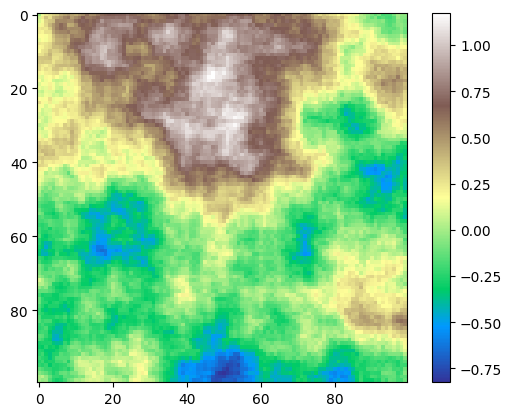

In [2]:
import numpy as np
from mapping import generar_mundo
from mapping import mostrar_mapa
from mapping import mostrar_mapas
from mapping import crear_microzonas
from mapping import crear_bosques
from mapping import crear_hidrico
from mapping import crear_pendientes
from mapping import crear_vial
world = generar_mundo(100,100,100,6,0.5,3.0,2023)
mostrar_mapa(world,'terrain')

Para terminos prácticos del modelo 

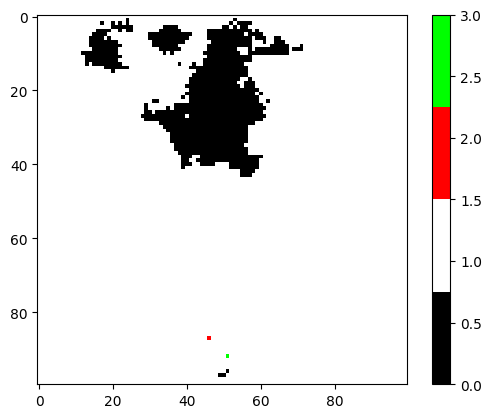

In [2]:
microzonas, cmap = crear_microzonas(world, world.shape,.8)
mostrar_mapa(microzonas,cmap)

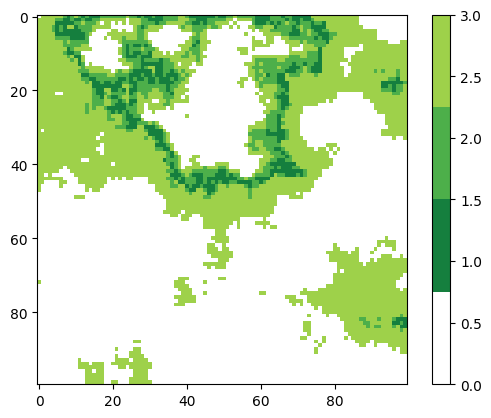

In [3]:
bosques, cmap = crear_bosques(world, microzonas)
mostrar_mapa(bosques,cmap)

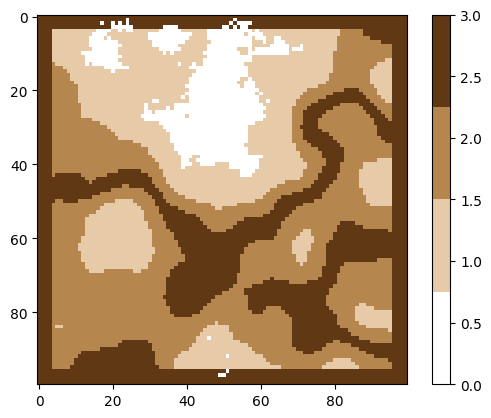

In [4]:
mostrar_mapa(crear_pendientes(world,microzonas)[0],crear_pendientes(world,microzonas)[1])

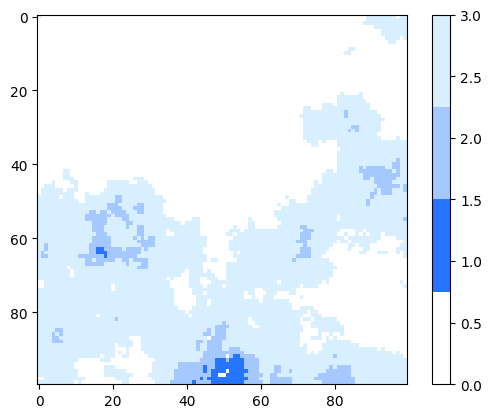

In [5]:
mostrar_mapa(crear_hidrico(world,microzonas)[0],crear_hidrico(world,microzonas)[1])

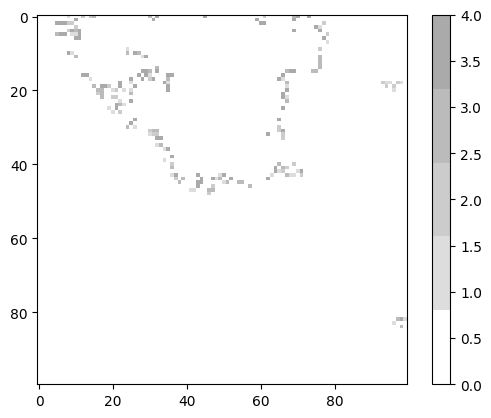

In [6]:
mostrar_mapa(crear_vial(world, microzonas,1)[0],crear_vial(world, microzonas,1)[1])

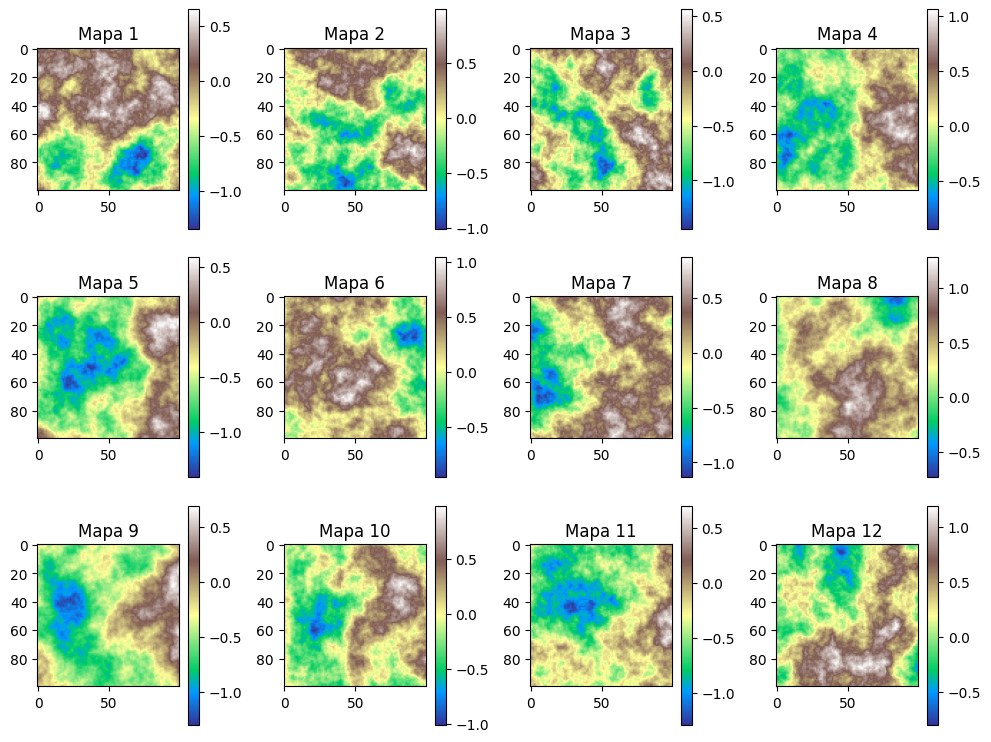

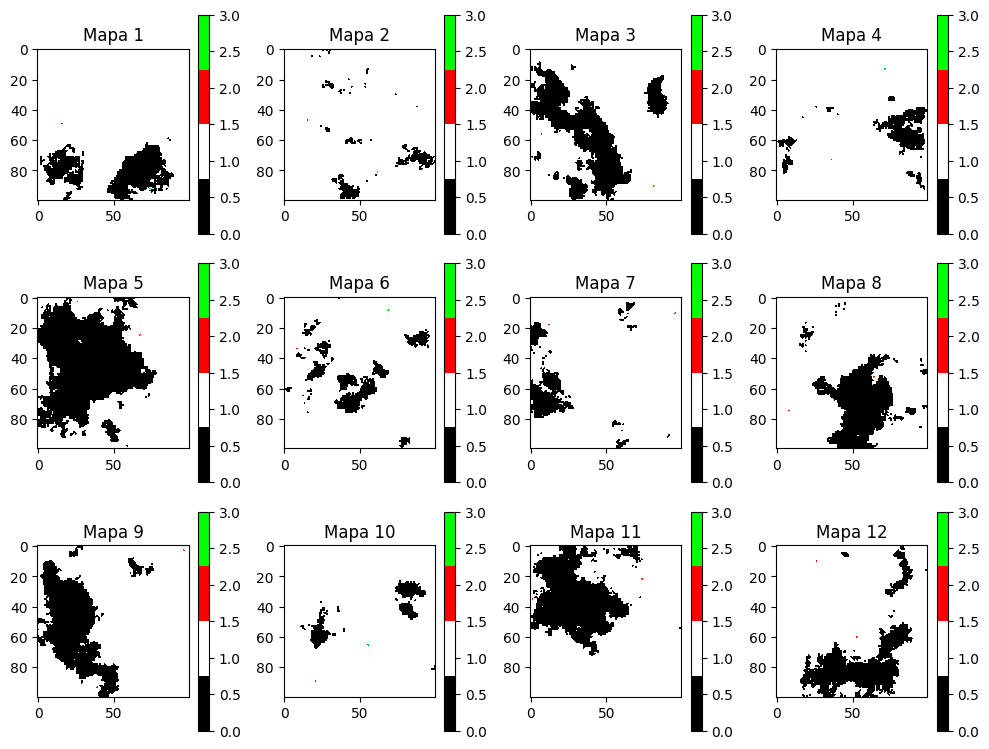

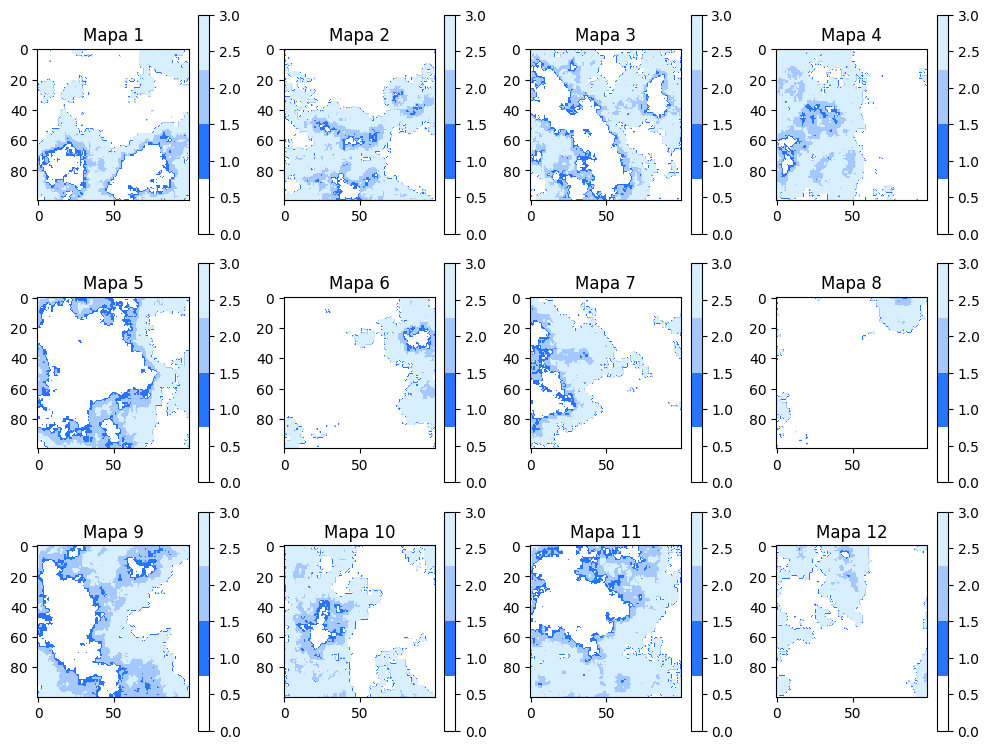

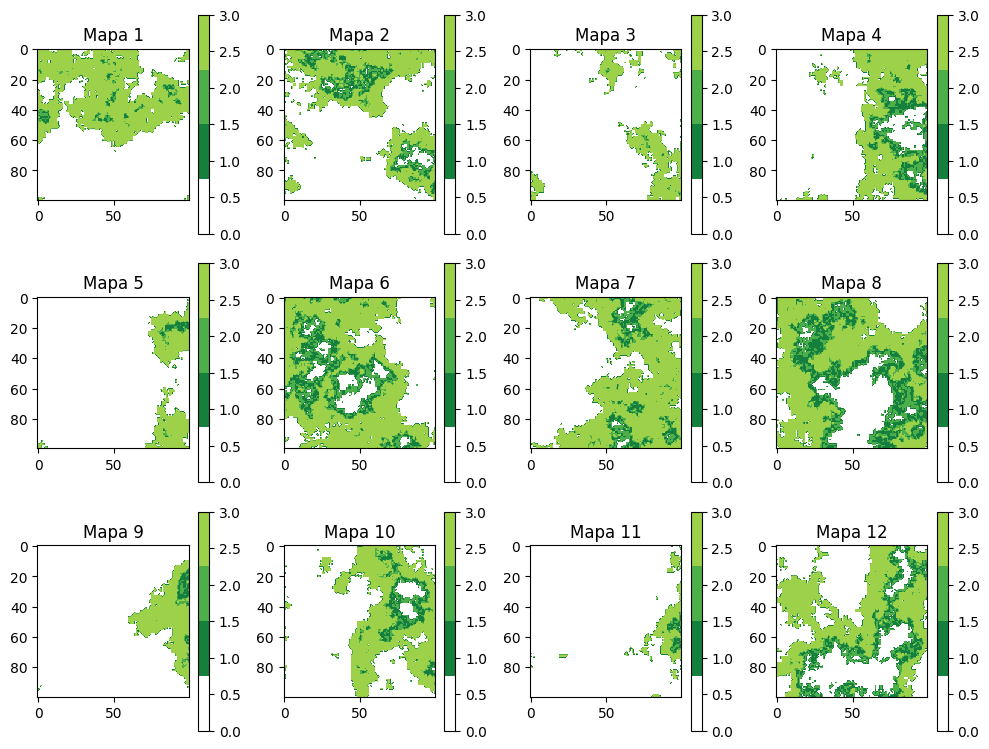

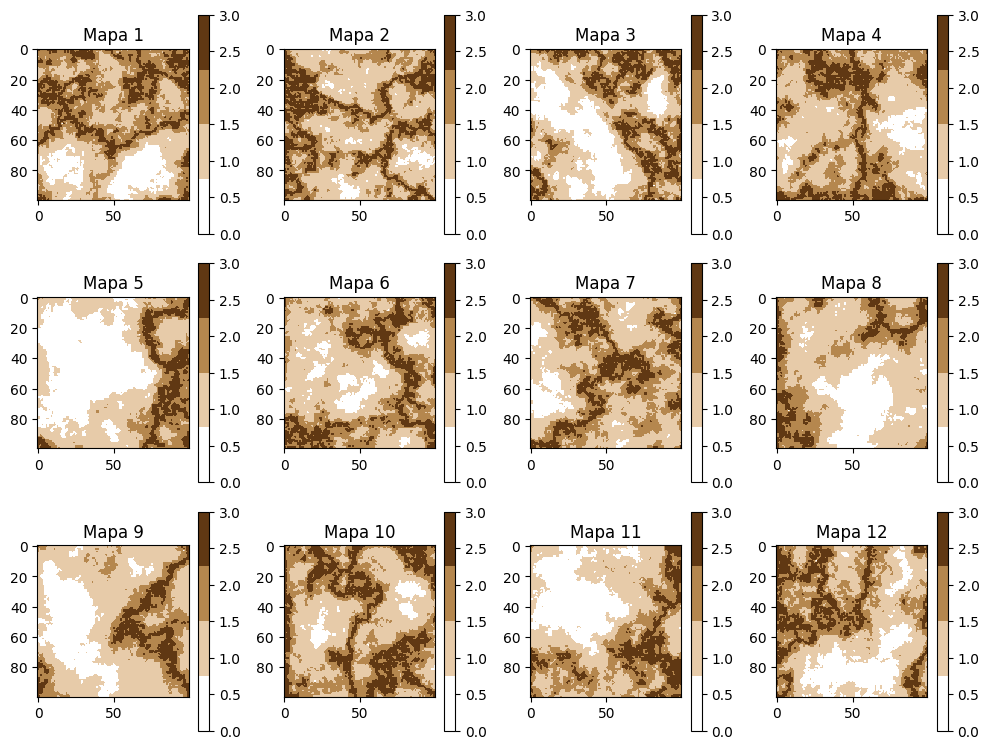

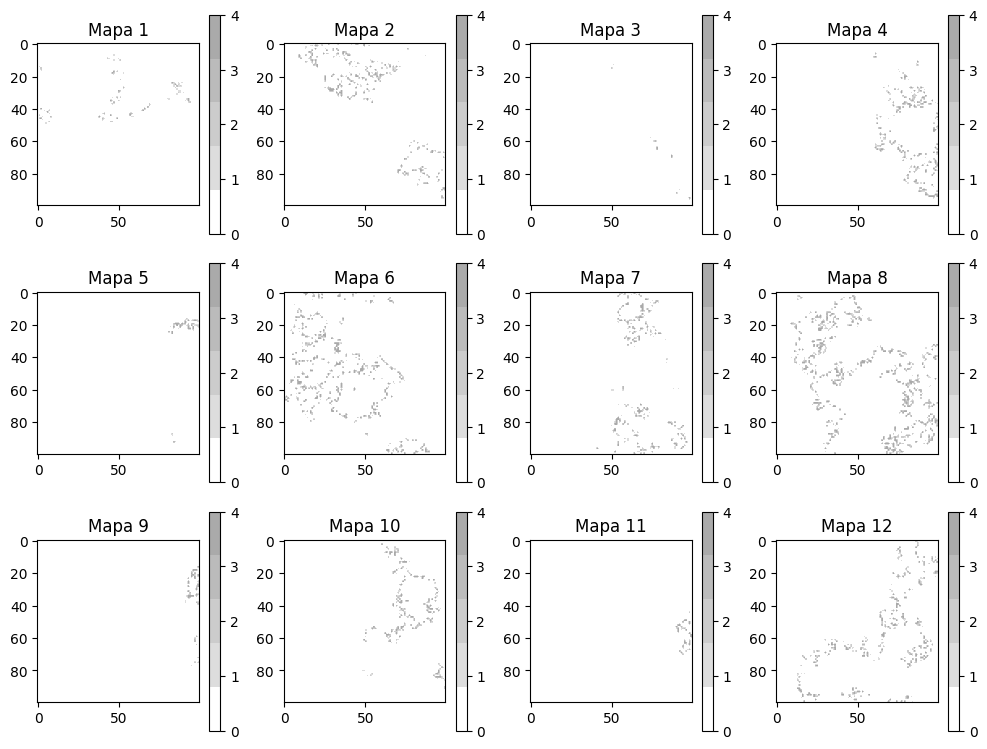

In [5]:
n = 12
worlds = []
microzonas = []
hidricos = []
bosques = []
pendientes = []
vias = []
for i in range(n):
    world = generar_mundo(100,100,100,6,0.5,3.0,15*i)
    microzona, cmap_microzona = crear_microzonas(world, world.shape, .7 )
    hidrico, cmap_hidrico = crear_hidrico(world, microzona)
    bosque, cmap_bosque = crear_bosques(world, microzona)
    pendiente, cmap_pendiente = crear_pendientes(world, microzona)
    via, cmap_vial = crear_vial(world, microzona,1)
    
    worlds.append(world)
    microzonas.append(microzona)
    hidricos.append(hidrico)
    bosques.append(bosque)
    pendientes.append(pendiente)
    vias.append(via)
mostrar_mapas(worlds, 'terrain')
mostrar_mapas(microzonas, cmap_microzona)
mostrar_mapas(hidricos, cmap_hidrico)
mostrar_mapas(bosques, cmap_bosque)
mostrar_mapas(pendientes, cmap_pendiente)
mostrar_mapas(vias,cmap_vial)
